In [9]:
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.models import load_model

### Based Line

Train: 1.000, Test: 0.914


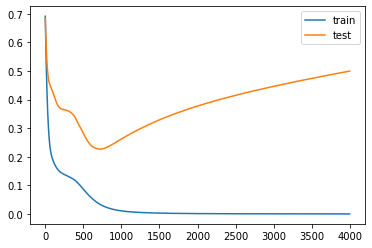

In [ ]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Early Stopping

Epoch 00245: early stopping
Train: 0.967, Test: 0.814


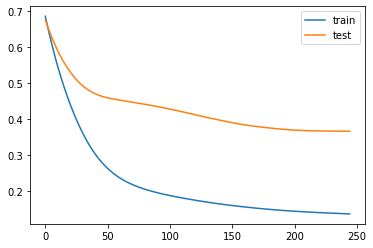

In [ ]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])

_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Early stopping with patience

Epoch 00962: early stopping
Train: 1.000, Test: 0.943


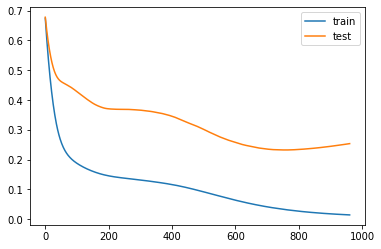

In [ ]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Model Checkpoint

In [ ]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])
saved_model = load_model('best_model.h5')
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 00001: val_accuracy improved from -inf to 0.55714, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.55714 to 0.62857, saving model to best_model.h5

Epoch 00003: val_accuracy improved from 0.62857 to 0.64286, saving model to best_model.h5

Epoch 00004: val_accuracy improved from 0.64286 to 0.67143, saving model to best_model.h5

Epoch 00005: val_accuracy improved from 0.67143 to 0.68571, saving model to best_model.h5

Epoch 00006: val_accuracy did not improve from 0.68571

Epoch 00007: val_accuracy did not improve from 0.68571

Epoch 00008: val_accuracy did not improve from 0.68571

Epoch 00009: val_accuracy did not improve from 0.68571

Epoch 00010: val_accuracy did not improve from 0.68571

Epoch 00011: val_accuracy did not improve from 0.68571

Epoch 00012: val_accuracy did not improve from 0.68571

Epoch 00013: val_accuracy did not improve from 0.68571

Epoch 00014: val_accuracy did not improve from 0.68571

Epoch 00015: val_accuracy did not improve f

### Reducing learning rate 

In [11]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
rlop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=200)

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc, rlop])
saved_model = load_model('best_model.h5')
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.943
